In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn


In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [3]:
ds=pd.read_csv('medical_cost_insurance.csv')
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df=pd.DataFrame(ds)

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df.sex=le.fit_transform(df.sex)

In [12]:
df.smoker=le.fit_transform(df.smoker)

In [13]:
df.region=le.fit_transform(df.region)

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [15]:
df_corr=df.corr()

In [16]:
df_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

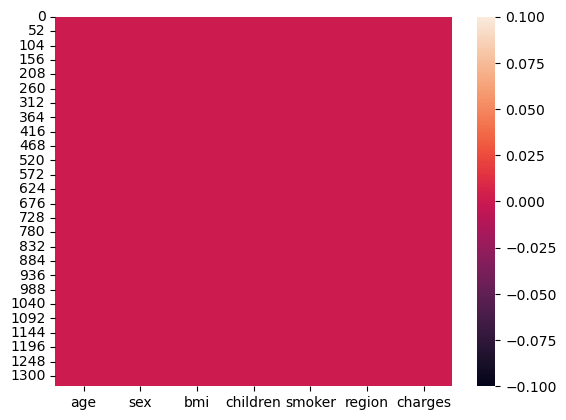

In [18]:
sns.heatmap(df.isnull())

In [19]:
df_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

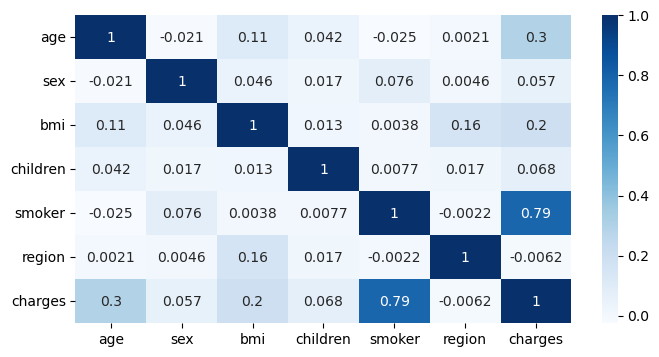

In [20]:
plt.figure(figsize=(8,4))
sns.heatmap(df_corr,cmap='Blues',annot=True)

<Axes: >

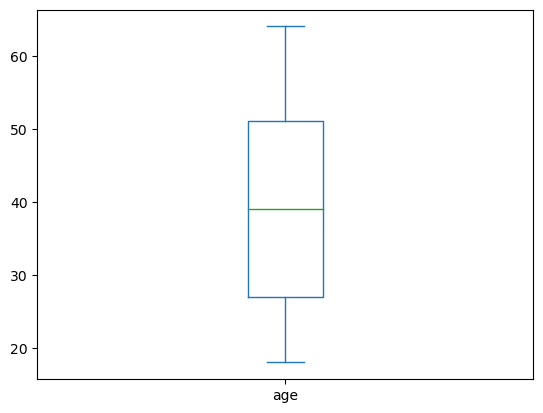

In [21]:
df['age'].plot.box()

In [22]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [23]:
df.smoker=df.smoker

In [24]:
import scipy
from scipy.stats import zscore,boxcox

<Axes: ylabel='Frequency'>

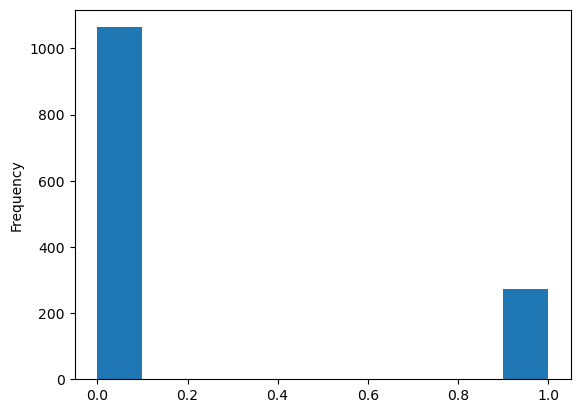

In [25]:
df.smoker.plot.hist()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
x=df.iloc[:,0:-1]

In [29]:
y=df.iloc[:,-1]

In [30]:
x_scaled=scaler.fit_transform(x)

In [31]:
x_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [32]:
x=pd.DataFrame(x_scaled)

In [33]:
lr=LinearRegression()

In [34]:
z=zscore(df)

In [35]:
df_new=df[(z<3).all(axis=1)]

In [36]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [37]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [38]:
x=scaler.fit_transform(x)

In [39]:
x=pd.DataFrame(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=55)

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr.score(x_train,y_train)

0.7550027029699783

In [43]:
pred=lr.predict(x_test)

In [44]:
print(mean_absolute_error(pred,y_test))

4049.2159699148474


In [45]:
pred

array([11318.93413553,   572.94315871,   227.04210074,  7927.54790726,
        2842.9122476 ,  6680.82067132, 35403.95953544, 14372.95585722,
       16230.30419007, 16990.02004279, 37769.36151713, 15100.65692009,
         859.28679984,  7573.15373941, 32700.96771453, 12156.15710968,
        9305.1061703 ,  3927.98765937, 27958.47591256, 13322.70389386,
       12087.80412573, 13318.2536527 , 33060.81981731, 10711.6281661 ,
        3732.03819241,  4036.90437909, 36425.63320227,   979.81954318,
        4324.99731137,  8681.08693122,  3667.99101053,  9276.98426505,
       12830.90042684,  3591.5391264 ,  5658.23663622, 12736.18012903,
       27193.01922179,  1566.57149431,  4191.19929817,  4600.00096381,
        7649.60562355,  1328.98474423, 10670.39298748,  9630.07551541,
       11167.50157881, 13170.76588538, 10269.51830172, 13785.71195449,
       12594.80051127,  6755.64768694,  4295.59437814, 10734.34400892,
       24827.98035691, 16416.25849168, 14818.11324517,   491.71550294,
      

In [48]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
SGD=SGDRegressor()

In [51]:
SGD.fit(x_train,y_train)

SGDRegressor()

In [52]:
SGD.score(x_train,y_train)

0.7549822537326738

In [53]:
lasso=Lasso()

In [54]:
lasso.fit(x_train,y_train)

Lasso()

In [55]:
lasso.score(x_train,y_train)

0.7550026622254892

In [56]:
rd=Ridge()

In [57]:
rd.fit(x_train,y_train)

Ridge()

In [58]:
rd.score(x_train,y_train)

0.7550019084421508

In [59]:
el=ElasticNet()

In [60]:
el.fit(x_train,y_train)

ElasticNet()

In [61]:
el.score(x_train,y_train)

0.6709438557346388

In [62]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [63]:
svr=SVR()

In [64]:
svr.fit(x_train,y_train)

SVR()

In [65]:
svr.score(x_train,y_train)

-0.09311292112126002

In [66]:
dtr=DecisionTreeRegressor()

In [67]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
dtr.score(x_train,y_train)

0.9994202724034231

In [69]:
knn=KNeighborsRegressor()

In [70]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8743382757187952

In [72]:
dtrpred=dtr.predict(x_test)

In [74]:
print(r2_score(y_test,dtrpred))

0.6955772460868177


In [75]:
print(mean_absolute_error(y_test,dtrpred))

3039.8381891463414


In [76]:
dtrpred

array([11150.78   ,  2322.6218 ,  1704.5681 ,  3490.5491 ,  1261.442  ,
        5979.731  , 41034.2214 , 13937.6665 , 12982.8747 , 12950.0712 ,
       47291.055  , 12646.207  , 22493.65964,  6250.435  , 24873.3849 ,
       12333.828  ,  4673.3922 , 18804.7524 , 36189.1017 , 11987.1682 ,
        5972.378  , 11150.78   , 39836.519  , 18806.14547,  2055.3249 ,
        3279.86855, 46889.2612 ,  1704.5681 ,  1532.4697 , 10493.9458 ,
        1261.442  ,  6082.405  , 11840.77505,  2643.2685 ,  5125.2157 ,
       13047.33235, 18310.742  ,  2201.0971 ,  4137.5227 ,  2205.9808 ,
        7640.3092 ,  2150.469  ,  7160.094  ,  9869.8102 , 11848.141  ,
       10601.63225,  8062.764  ,  9386.1613 ,  5662.225  , 24915.04626,
       10795.93733, 18806.14547, 32734.1863 , 11566.30055, 25517.11363,
       11884.04858,  3943.5954 ,  8413.46305, 16069.08475,  1877.9294 ,
       41919.097  ,  2459.7201 ,  9182.17   ,  5148.5526 , 19214.70553,
        1728.897  ,  1137.011  , 41919.097  ,  1261.442  , 26125

In [77]:
y_test

72      11741.72600
37       2302.30000
1212     1702.45530
906      4846.92015
430     23082.95533
           ...     
1068    14349.85440
421     46599.10840
555      3847.67400
494     17942.10600
1001    34472.84100
Name: charges, Length: 328, dtype: float64

In [92]:
dtr.predict(x_train)

array([ 4237.12655 ,  2899.48935 ,  2457.502   ,  2855.43755 ,
        7201.70085 , 11729.6795  ,  2902.9065  , 23401.30575 ,
       39727.614   , 11073.176   ,  2156.7518  ,  8428.0693  ,
       26467.09737 , 19040.876   ,  4883.866   ,  1984.4533  ,
        9704.66805 , 11356.6609  , 17468.9839  ,  2007.945   ,
        3994.1778  , 16115.3045  , 28868.6639  ,  1748.774   ,
        3972.9247  ,  7882.429475,  2045.68525 ,  3597.596   ,
        8342.90875 ,  5152.134   ,  9620.3307  ,  7804.1605  ,
        4762.329   , 10197.7722  ,  6548.19505 ,  3947.4131  ,
       13429.0354  ,  3176.8159  ,  3366.6697  ,  2261.5688  ,
       39725.51805 , 39241.442   ,  1837.237   , 11848.141   ,
       13470.86    ,  1261.859   ,  6770.1925  ,  5002.7827  ,
       41676.0811  , 47291.055   ,  2416.955   ,  6600.361   ,
        8516.829   , 10982.5013  , 10370.91255 ,  9850.432   ,
        5855.9025  ,  2221.56445 ,  1759.338   , 12979.358   ,
        3070.8087  ,  7421.19455 , 26392.26029 , 44585.

In [95]:
import joblib
joblib.dump(dtr,'dtrmodel.obj')

['dtrmodel.obj']

In [96]:
testdtr=joblib.load('dtrmodel.obj')

In [97]:
testdtr.predict(x_test)

array([11150.78   ,  2322.6218 ,  1704.5681 ,  3490.5491 ,  1261.442  ,
        5979.731  , 41034.2214 , 13937.6665 , 12982.8747 , 12950.0712 ,
       47291.055  , 12646.207  , 22493.65964,  6250.435  , 24873.3849 ,
       12333.828  ,  4673.3922 , 18804.7524 , 36189.1017 , 11987.1682 ,
        5972.378  , 11150.78   , 39836.519  , 18806.14547,  2055.3249 ,
        3279.86855, 46889.2612 ,  1704.5681 ,  1532.4697 , 10493.9458 ,
        1261.442  ,  6082.405  , 11840.77505,  2643.2685 ,  5125.2157 ,
       13047.33235, 18310.742  ,  2201.0971 ,  4137.5227 ,  2205.9808 ,
        7640.3092 ,  2150.469  ,  7160.094  ,  9869.8102 , 11848.141  ,
       10601.63225,  8062.764  ,  9386.1613 ,  5662.225  , 24915.04626,
       10795.93733, 18806.14547, 32734.1863 , 11566.30055, 25517.11363,
       11884.04858,  3943.5954 ,  8413.46305, 16069.08475,  1877.9294 ,
       41919.097  ,  2459.7201 ,  9182.17   ,  5148.5526 , 19214.70553,
        1728.897  ,  1137.011  , 41919.097  ,  1261.442  , 26125